<a href="https://colab.research.google.com/github/ambideXtrous9/Machine-Learning-Assignments/blob/main/214161006_214161011_Assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EE 527 Machine Learning Lab
# Assignment 06
-----------------------------------------
214161006 Pathak Sanchit Vivekanand

214161011 Sushovan Saha

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
from matplotlib.offsetbox import AnchoredText
import random

# Q1. TSP Solution using Stochastic Search

## Load Dataset

In [ ]:
path = "att48_d.txt"
path2 = "att48_xy.txt"

In [ ]:
df = pd.read_csv(path, delim_whitespace=True,header=None,engine='python')

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,0,4727,1205,6363,3657,3130,2414,563,463,5654,1713,1604,2368,2201,1290,1004,3833,2258,3419,2267,2957,720,1700,5279,2578,6076,3465,2654,3625,3115,1574,3951,1748,2142,6755,2383,3306,1029,3530,825,2188,4820,3489,1947,6835,1542,2379,3744
1,4727,0,3588,2012,1842,6977,6501,5187,5028,2327,4148,4723,3635,3125,4907,3930,7463,6338,7243,5105,4043,4022,3677,2863,3106,1850,7173,6630,1204,6814,6001,3447,5253,2656,3123,6274,7183,5622,3085,4564,2756,1591,7027,6186,3472,5461,4390,2088
2,1205,3588,0,5163,2458,3678,3071,1742,1444,4462,1184,1520,1498,1103,1501,951,4298,2903,3967,2169,2209,652,828,4136,1518,4873,3954,3254,2446,3581,2441,2960,1966,950,5564,2916,3878,2035,2482,1027,1395,3617,3891,2686,5661,2023,1867,2560
3,6363,2012,5163,0,2799,8064,7727,6878,6581,1402,5366,5946,4679,4378,6225,5709,8417,7578,8296,6135,4802,5707,4982,2322,4178,320,8186,7800,2778,7859,7408,3763,6461,4223,1427,7451,8263,7131,3669,6011,4638,1681,7987,7502,1877,6758,5360,2844
4,3657,1842,2458,2799,0,5330,4946,4200,3824,2012,2573,3157,1924,1580,3427,3179,5749,4793,5577,3409,2223,3066,2185,1860,1401,2491,5486,5035,894,5141,4611,1669,3677,1590,3113,4682,5533,4352,1252,3227,2426,1169,5313,4706,3241,3962,2651,304


In [ ]:
D = df.to_numpy()

In [ ]:
df2 = pd.read_csv(path2, delim_whitespace=True,header=None,engine='python')

In [ ]:
df2 = df2.to_numpy()

## Implementation

In [ ]:
POP_SIZE = 1000
MAX_ITER = 1000
K_iter = 200

In [ ]:
def Y_dist(S,D):
  Y = []
  for i in range(len(S)):
    t=0
    for j in range(len(S[0])-1):
      t += D[S[i][j]-1][S[i][j+1]-1]
    Y.append(-t)
  return np.array(Y)

In [ ]:
def TSP(maxIter,m,K_iter=200):
  
  SS=[]
  YY=[]
  A = np.arange(2, 49,1)
  S = []
  for i in range(m):
    np.random.shuffle(A)
    B = A
    B = np.insert(B,0,1,axis=0)
    B = np.append(B,1)
    S.append(B)
  S = np.array(S)

  Y  = Y_dist(S,D)

  for i in range(1,maxIter+1):
    Children = []
    #---generate non-negative set Ut from Yt---
    U = Y - np.min(Y)

    #---evaluate Pt by sum normalizing Ut---
    P = U/np.sum(U)

    
    for j in range(m):
      #get cardinality
      K = np.round(m*P[j]).astype(int)
      if K==0:
        continue
      else:
        for t in range(K):
          pos1,pos2 = np.random.choice(range(1, 48),2)
          sl = np.copy(S[j])
          sl[pos1], sl[pos2] = sl[pos2], sl[pos1]
          Children.append(sl)
        #---generate Best solution set {St+1,Yt+1}
    C = np.array(Children)
    S_union = np.unique(np.concatenate([S,C]),axis=0)
    Y_union = Y_dist(S_union, D)

    #idx = np.argpartition(Y_union,-m)[-m:]
    idx = Y_union.argsort()[-m:]
    S = S_union[idx]
    Y = Y_union[idx]
    bIdx = np.argmax(Y)
    YY.append(-Y[bIdx])
    SS.append(S[bIdx])

    if i%K_iter == 0 and i!=0:
      
      LOC = []
      for z in range(len(S[bIdx])):
        LOC.append(df2[S[bIdx][z]-1])

      
      LOC = np.array(LOC)

      
      
      x = np.copy(LOC[:,0])
      y = np.copy(LOC[:,1])


      u = np.diff(x)
      v = np.diff(y)

     
      
      pos_x = x[:-1] + u/2
      pos_y = y[:-1] + v/2
      norm = np.sqrt(u**2+v**2)
      
      plt.figure(figsize=(12,6))
      plt.plot(LOC[:,0],LOC[:,1],color="darkblue",marker = 'o', markerfacecolor = 'yellow', markersize = 10,label="Path")
      plt.plot(LOC[0][0],LOC[0][1],markersize=20,marker = '*', markeredgecolor="red", markerfacecolor="red",label='Start Point')
      plt.quiver(pos_x,pos_y, u/norm, v/norm, angles="xy", scale=50, pivot="mid",color='grey')
      st = "ITER = {}, OPTIMIZED DISTANCE = {}".format(i,-Y[bIdx])
      plt.title(st)
      plt.xlabel("x")
      plt.ylabel("y")
      plt.grid()
      plt.legend()
      plt.show()

  bI = np.argmax(Y)
  Y_best = -Y[bI]
  S_best = S[bI] 
  return YY,SS,Y_best,S_best

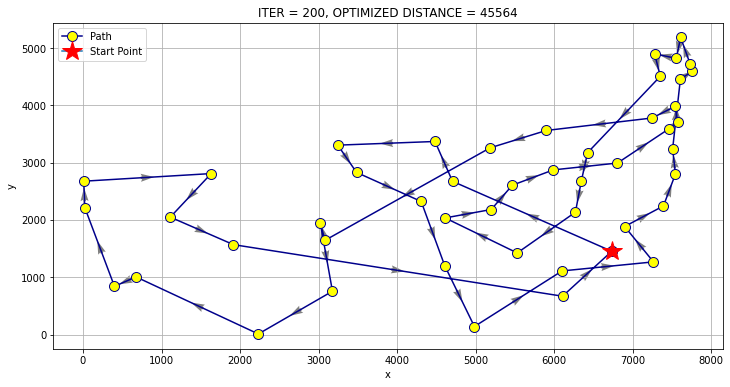

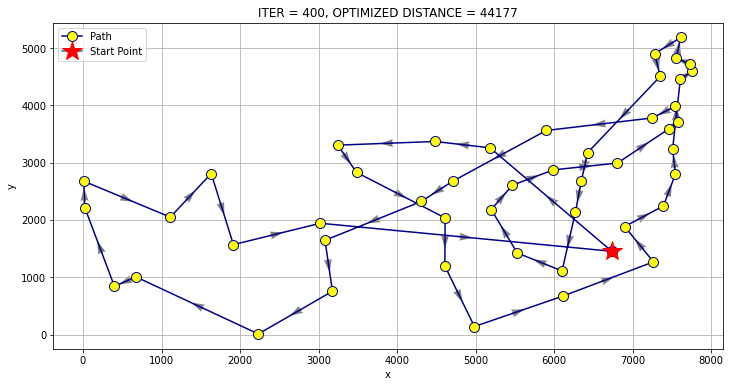

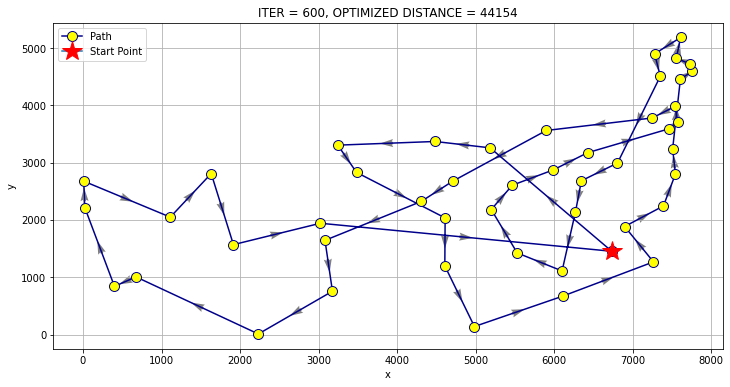

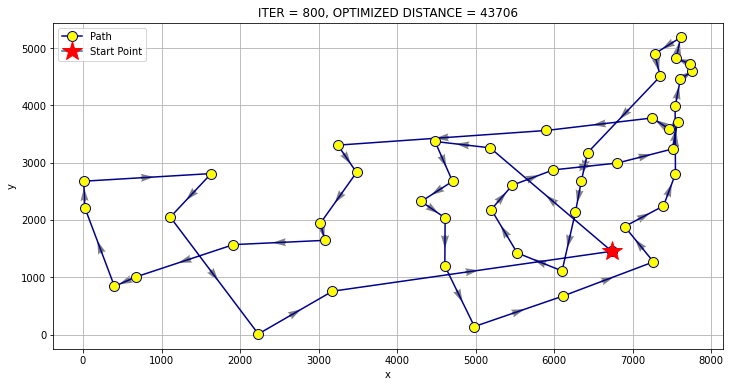

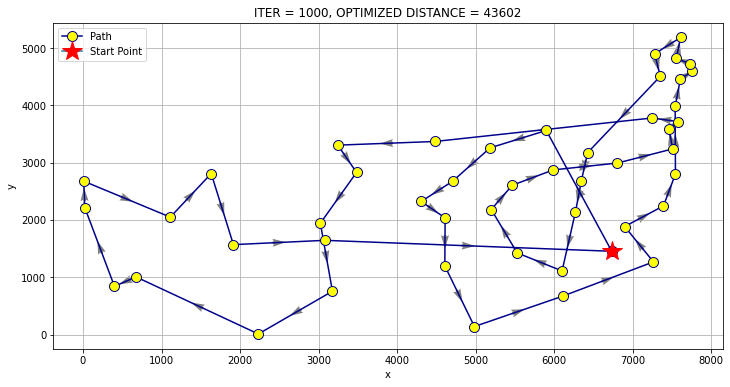

In [ ]:
YY,SS,Y_best,S_best = TSP(MAX_ITER,POP_SIZE,K_iter)

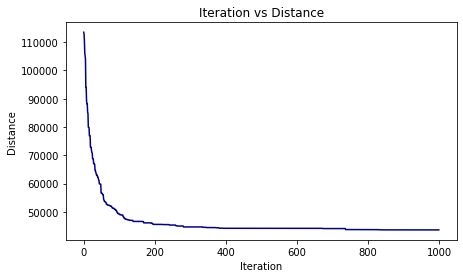

In [ ]:
#print(YY)
plt.figure(figsize=(7,4))
plt.plot(np.arange(0,MAX_ITER),YY,color="darkblue")
plt.title("Iteration vs Distance")
plt.xlabel("Iteration")
plt.ylabel("Distance")
plt.show()

In [ ]:
Y_best

43602

In [ ]:
S_best

array([ 1, 20, 47, 13, 25, 14, 34, 41, 16,  8,  9, 38, 31, 28,  6, 37, 19,
       27, 17, 43, 30, 33, 15, 40, 22,  3, 23, 11, 12, 46, 44, 18,  7, 36,
       21, 32, 39, 48, 29,  2, 26,  4, 35, 45, 10, 24, 42,  5,  1])

# Q2. Maximization using PSO

In [ ]:
#define the equation of given multi-modal function
def mini_eqn(x,y,a,b,c,d):
  '''This function returns the exp{-(((x-a)**2)/c + ((y-b)**2)/d)} sub-part of the given equation of z.
  This is done for code-readability'''
  temp1 = ((x-a)**2)/c
  temp2 = ((y-b)**2)/d
  temp = temp1+temp2
  return np.exp(-temp)

def full_eqn(x1,y1):
  return (1.7*mini_eqn(x1,y1,3,3,10,10) + mini_eqn(x1,y1,-5,-5,8,8) + 2*mini_eqn(x1,y1,0,0,4,5)
  + 1.5*mini_eqn(x1,y1,4,-4,18,16) + 1.2*mini_eqn(x1,y1,-4,4,18,16))

def plot_my_contour(aa,bb,z):
  plt.figure(figsize=(3,3))
  plt.contour(aa,bb,z)
  #plt.title("Contour Plot (x0,y0,iter)")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.grid(True)
  plt.xticks(ticks=range(-10,10,2))
  plt.yticks(ticks=range(-10,10,2))


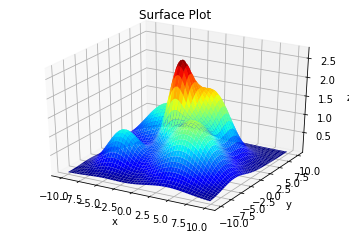

In [ ]:
#set min & max of x & y as per question
xmin = -10
xmax = 10
ymin = -10
ymax = 10

#set the x-axis & y-axis
x = np.arange(xmin,xmax,0.1)
y = np.arange(ymin,ymax,0.1)

#generate a meshgrid
xx,yy = np.meshgrid(x,y)

#plot the surface plot of z
plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(xx,yy,full_eqn(xx,yy), cmap="jet")
ax.set_title("Surface Plot")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

In [ ]:
def PSO(Xmin, Xmax, popSize, maxIter, psoParams):
  '''psoParams: [w, phiP, phiG]
  phiP = Cognitive Component of Particle
  phiG = Social Component of Particle
  w = Momentum Component for Particle Velocity
  '''
  w = psoParams[0]
  phiP = psoParams[1]
  phiG = psoParams[2]
  m = popSize
  n = len(Xmin)

  #initialize solution set S0
  alpha_ij = np.random.uniform(0, 1, size=(m,n))
  x = (1-alpha_ij)*Xmin + alpha_ij*Xmax
  v = np.zeros((m,n))
  p = x
  y = full_eqn(x[:,0], x[:,1])

  #initialize global best position
  k = np.argmax(y)
  g = x[k,:]

  #plot
  PLOTS_PER_ROW = 2
  a,b=0,0
  s = "popSize={}, maxIter={}, psoParams[w, phiP, phiG]={}".format(popSize, maxIter, psoParams)
  ki=maxIter
  fig, axs = plt.subplots(math.ceil(ki/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(10,10))
  fig.suptitle(s,fontsize=20)

  #loop till maxIter
  for i in range(maxIter):
    #update particle velocities
    beta_ij = np.random.uniform(0, 1, size=(m,n))
    gamma_ij = np.random.uniform(0, 1, size=(m,n))
    v = w*v + phiP*beta_ij*(p-x) + phiG*gamma_ij*(g-x)
    #update particle positions
    x = x + v
    #update particle fitness scores
    y = full_eqn(x[:,0], x[:,1])
    #update particle best positions
    p = np.array([x[i,:] if y[i] < full_eqn(p[i,0], p[i,1]) else p[i,:] for i in range(p.shape[0])])
    #evaluate global best position
    k = np.argmax(full_eqn(p[:,0], p[:,1]))
    g = p[k,:]
    
    #---plot scatter in each iteration---
    s = "ITER =  {}".format(i+1)
    axs[a][b].contour(xx,yy,full_eqn(xx,yy))
    axs[a][b].scatter(x[:,0], x[:,1], label='solution')
    axs[a][b].set_xlim([Xmin[0],Xmax[0]])
    axs[a][b].set_ylim([Xmin[1],Xmax[1]])
    axs[a][b].add_artist(AnchoredText(s, loc=4))
    axs[a][b].legend(loc='best')
    b+=1
    if b%PLOTS_PER_ROW==0:
      a+=1
      b=0
  plt.show()
  k = np.argmax(full_eqn(p[:,0], p[:,1]))
  gBest = p[k,:]
  
  return gBest, full_eqn(gBest[0], gBest[1])
bestbestX, bestbestY, maxmaxF = 0,0,0

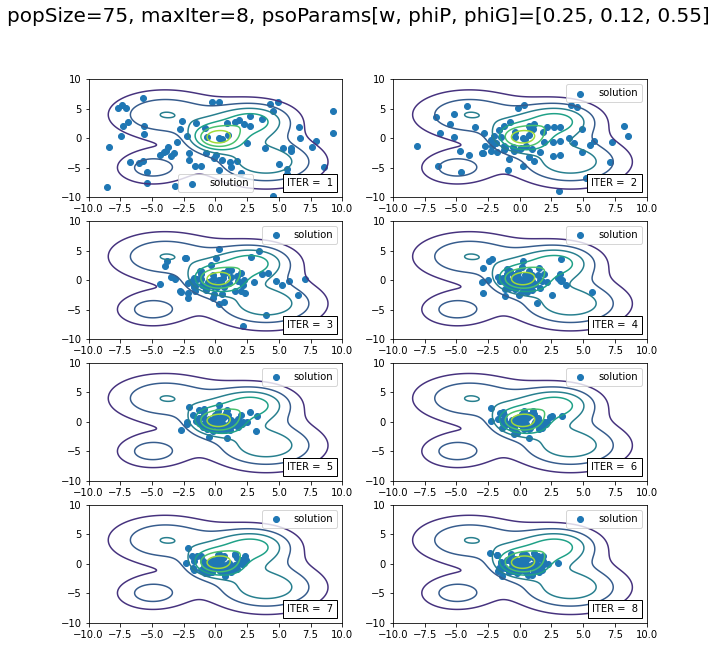


Solution (x*,y*,z*): ( 0.2800169568162598 , 0.016215248675909066 , 2.7100196365059532 )


In [ ]:
[bestX, bestY], maxF = PSO([-10,-10],[10,10],popSize=75,maxIter=8,psoParams=[0.25,0.12,0.55])
print("\nSolution (x*,y*,z*): (", bestX, ",", bestY, ",", maxF, ")")
if maxF>=maxmaxF:
  bestbestX = bestX
  bestbestY = bestY
  maxmaxF = maxF

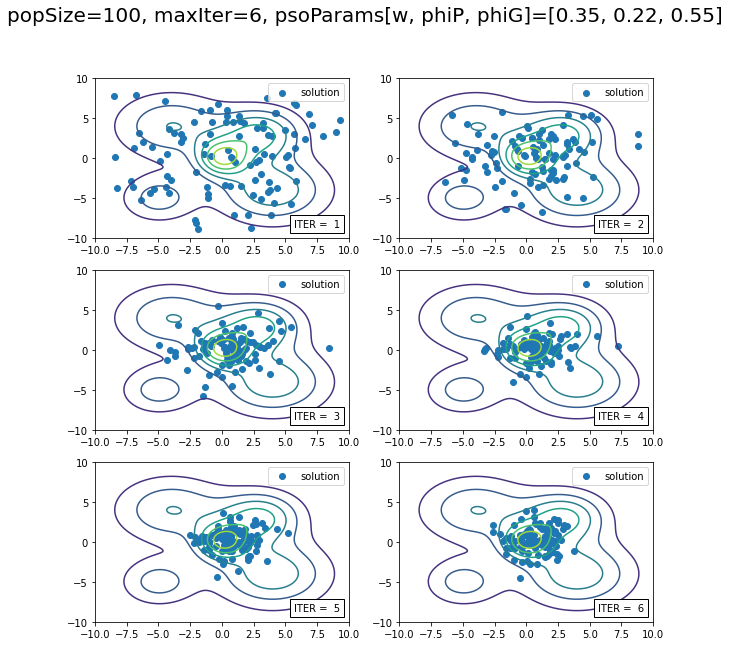


Solution (x*,y*,z*): ( 0.7525417681857931 , 0.16897943423251505 , 2.6054058232931476 )


In [ ]:
[bestX, bestY], maxF = PSO([-10,-10],[10,10],popSize=100,maxIter=6,psoParams=[0.35,0.22,0.55])
print("\nSolution (x*,y*,z*): (", bestX, ",", bestY, ",", maxF, ")")
if maxF>=maxmaxF:
  bestbestX = bestX
  bestbestY = bestY
  maxmaxF = maxF

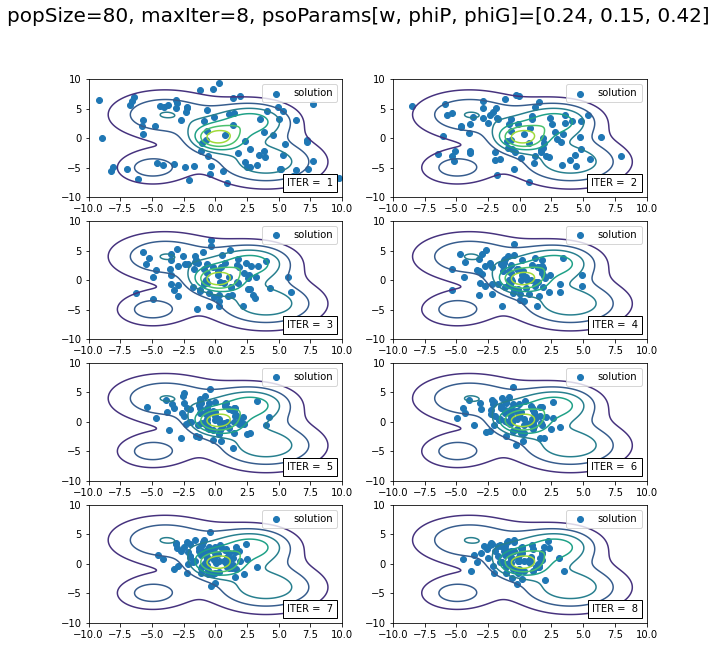


Solution (x*,y*,z*): ( -0.6688824016211221 , 1.214087888083009 , 2.134663228259085 )


In [ ]:
[bestX, bestY], maxF = PSO([-10,-10],[10,10],popSize=80,maxIter=8,psoParams=[0.24,0.15,0.42])
print("\nSolution (x*,y*,z*): (", bestX, ",", bestY, ",", maxF, ")")
if maxF>=maxmaxF:
  bestbestX = bestX
  bestbestY = bestY
  maxmaxF = maxF

In [ ]:
print("\nBest Solution (x*,y*,z*): (", bestbestX, ",", bestbestY, ",", maxmaxF, ")")


Best Solution (x*,y*,z*): ( 0.2800169568162598 , 0.016215248675909066 , 2.7100196365059532 )
